# How to Edit a Single Video

This notebooks provides an example of how to remove blank segments from a video using <b>PyVHS</b> as a Python library in a Jupyter Notebook. The command line usage of <b>PyVHS</b> allows for a simple and automated approach for performing the same task.

# User Input

In [1]:
# Path to the video to have blank segments removed
PATH_VIDEO = (f'/nvme4tb/videos_to_edit/'
              f'video3.mp4')

# Import Modules and Libraries

In [ ]:
from PIL import Image
from pathlib import Path
import pkg_resources
import numpy as np
import matplotlib.pyplot as plt
from pyvhs.utils.files import VideosToEdit
from pyvhs.utils.edits import EditVideo

# Create Video Clip

In [3]:
# List video files
videos = VideosToEdit(path=PATH_VIDEO)
videos.list_videos()
print(f'Num. of Vidoes to Edit: {len(videos.edited):,}')
print((f'Save Path for the Video after editing: '
       f'\n\t{videos.edited[0].as_posix()}'))

Num. of Vidoes to Edit: 1
Save Path for the Video after editing: 
	/nvme4tb/videos_to_edit/video3_edited.mp4


# Load Template Images

The template images are the frames that will be removed from the video clip. The images currently stored in `pyvhs/template_imgs` represent the blank screens found when digitizing VHS cassettes. When video segments with at least 2 sequentially identified occurrences of these images are found that segment of video will be flagged for removal.

A user can add as many images as they want to `pyvhs/template_imgs` or simply reference another path to a folder containing images they want to be identified in the video.

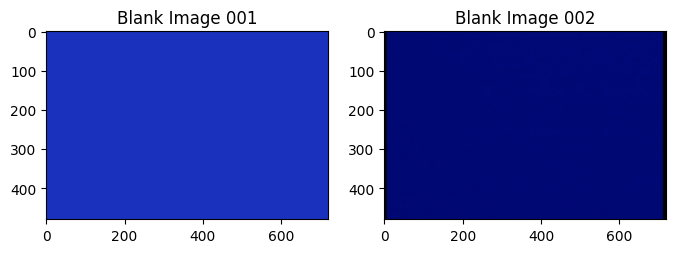

In [4]:
# Default Path to PyVHS template images
DEFAULT_PATH_TEMPLATES = pkg_resources.resource_filename('pyvhs', 'template_imgs/')

template_imgs = []
for f in Path(DEFAULT_PATH_TEMPLATES).glob('*.png'):
    template_imgs.append(np.array(Image.open(f)))

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(template_imgs[0])
ax[1].imshow(template_imgs[1])
ax[0].set_title('Blank Image 001')
ax[1].set_title('Blank Image 002')
plt.show()

# Identify and Remove the Template Images from Video

In [5]:
# Create a video editing object
video_edit = EditVideo(path_original=videos.original[0],
                       path_edited=videos.edited[0],
                       templates=template_imgs,
                       interval=3,
                       )
print(f'Video Duration: {video_edit.duration:,.2f} seconds')
print(f'Check Video Frames Every: {video_edit.interval:,} seconds')

Video Duration: 7,026.53 seconds
Check Video Frames Every: 3 seconds


In [6]:
# Identify segments of footage to keep and blank segments
final_clip = video_edit.remove_blank_frames()

In [7]:
# Blank segments found in the video
num_blank_segments = len(video_edit.blank_segments)
for i, blank_seg in enumerate(video_edit.blank_segments):
    print((f'Blank Segment {i + 1} of {num_blank_segments:,}: '
           f'{blank_seg[0]} - {blank_seg[1]} seconds'))

Blank Segment 1 of 3: 1929 - 1931 seconds
Blank Segment 2 of 3: 2258 - 2330 seconds
Blank Segment 3 of 3: 2332 - 2341 seconds


# Save Edited Video to Disk

The final video clip is a concatenation of the keep segments containing footage.

In [8]:
final_clip.write_videofile(videos.edited[0].as_posix(),
                           verbose=False)

Moviepy - Building video /nvme4tb/videos_to_edit/video3_edited.mp4.
MoviePy - Writing audio in video3_editedTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /nvme4tb/videos_to_edit/video3_edited.mp4



Moviepy - Done !
Moviepy - video ready /nvme4tb/videos_to_edit/video3_edited.mp4
